In [7]:
#!pip install q keras==2.2.4
#!pip install tensorflow==1.14.0
%pip install q keras==2.13.1
%pip install tensorflow==2.13.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [10]:
!nvidia-smi

Thu Oct 12 18:39:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.125.06   Driver Version: 525.125.06   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P8    N/A /  N/A |      4MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
##    Obtenemos los .npy de google drive.

!gdown 1pbyR5AMrnoJMNKLFpB95_6DlwyU3URx0
!gdown 1JgZTk7PzjeA-MZ6Ow8JGrhMU9YByfmvo

#https://drive.google.com/file/d/1pbyR5AMrnoJMNKLFpB95_6DlwyU3URx0/view?usp=sharing
#https://drive.google.com/file/d/1JgZTk7PzjeA-MZ6Ow8JGrhMU9YByfmvo/view?usp=sharing


/bin/bash: line 1: gdown: command not found


/bin/bash: line 1: gdown: command not found


In [12]:
X_raw = np.load('X.npy')
#X_raw = X_raw/255
print(len(X_raw))
print(len(X_raw[1]))
print(len(X_raw[1][1]))
print(X_raw[1][1][1])

490
200
200
0


### Preparar datos

In [13]:
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)
#X[14]

array(['Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', '

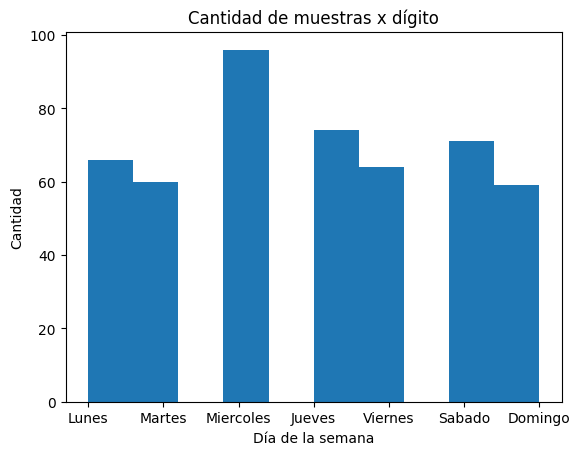

In [14]:
plt.figure()
plt.title("Cantidad de muestras x dígito")
plt.ylabel("Cantidad")
plt.xlabel("Día de la semana")
plt.hist(y, bins=10)
plt.plot()
y

### Visualizando el `dataset`

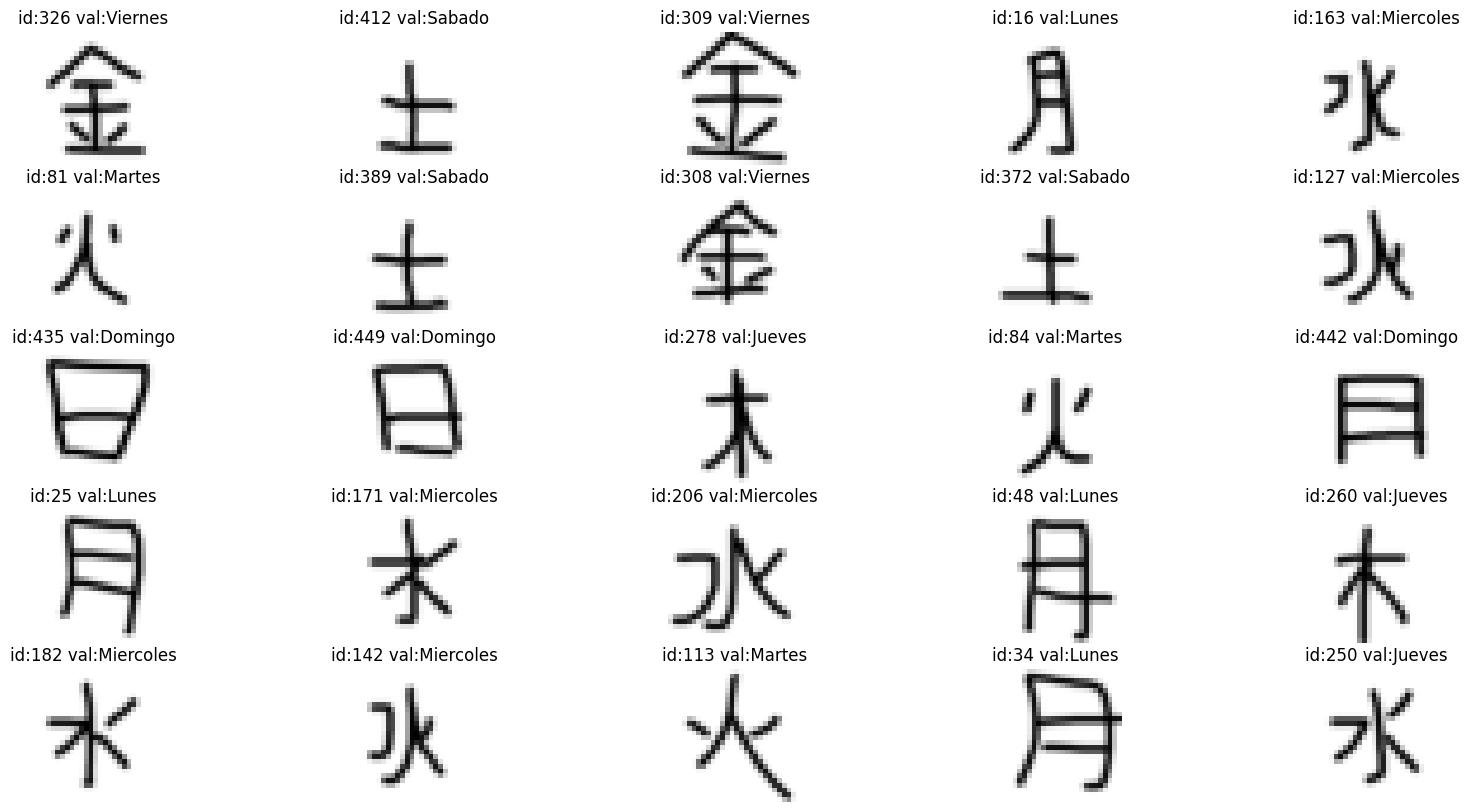

In [15]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

### Split de train-test

In [16]:
X.shape

(490, 28, 28)

In [19]:
#Convertimos y a un array de números
print(y.shape[0])
print(y[2])
y_n = np.empty((y.shape[0]))

for i in range(y.shape[0]):
    if y[i] == 'Lunes': y_n[i] = 0;
    if y[i] == 'Martes': y_n[i] = 1;
    if y[i] == 'Miercoles': y_n[i] = 2;
    if y[i] == 'Jueves': y_n[i] = 3;
    if y[i] == 'Viernes': y_n[i] = 4;
    if y[i] == 'Sabado': y_n[i] = 5;
    if y[i] == 'Domingo': y_n[i] = 6;

y_n


490
Lunes


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 3., 3.

In [20]:
#Separamos el dataset en un grupo de entrenamiento y uno de testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y_n, test_size=0.20, random_state=42, stratify=y)

[]

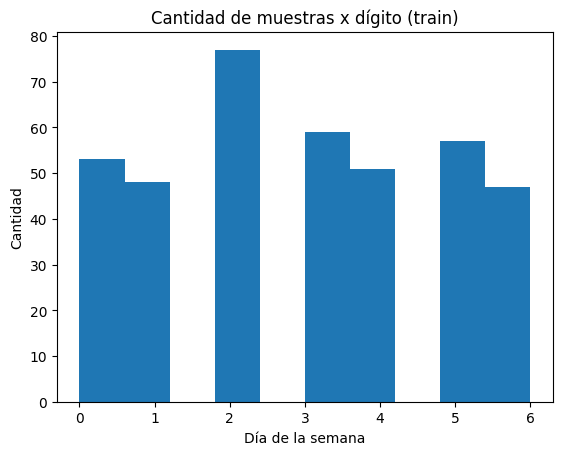

In [21]:
plt.figure()
plt.title("Cantidad de muestras x dígito (train)")
plt.ylabel("Cantidad")
plt.xlabel("Día de la semana")
plt.hist(y_train, bins=10)
plt.plot()

[]

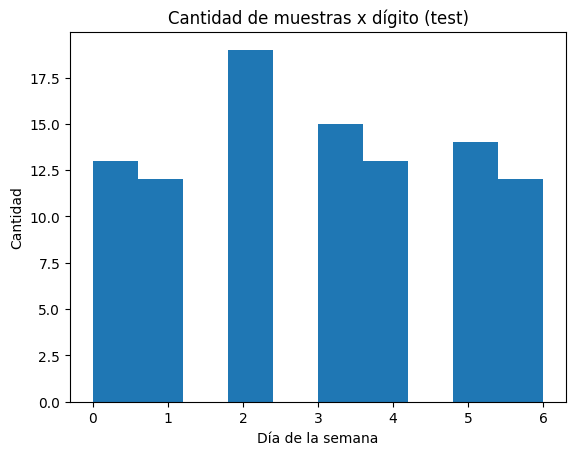

In [22]:
plt.figure()
plt.title("Cantidad de muestras x dígito (test)")
plt.ylabel("Cantidad")
plt.xlabel("Día de la semana")
plt.hist(y_test, bins=10)
plt.plot()

In [23]:
# Ajustamos las dimensiones de las imágenes
print(X_train.shape, X_test.shape)
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(392, 28, 28) (98, 28, 28)
(392, 28, 28, 1) (98, 28, 28, 1)


## Definimos un modelo

In [24]:
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense, Conv2D, MaxPool2D, Flattenf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD

bs = 16
lr = 0.0005

#Espacio de busqueda
#Cantidad Filtros: 32, 64, 128, 256
#Tamaño del Filtro: 3, 5, 7
#Activaciones: 'relu', 'sigmoid', 'tanh'
#Unidades Dense: 128, 256, 100..
#lr: 0.001, 0.0001, 0.00001, etc
#bs: 8, 16, 32...

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(*size,1)),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), #modificar!
                    Dense(7, activation='softmax')]) #no modificar

optimizer1=SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
# La pérdida 'sparse_categorical_crossentropy' realiza automaticamente la conversión
# del target a one-hot encoding.

model.summary()

2023-10-12 18:40:53.739861: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-12 18:40:54.090275: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 18:40:56.744274: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 18:40:56.745891: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 18:40:59.165348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

## Entrenamiento

In [25]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
25/25 [==============================] - 3s 34ms/step - loss: 1.9436 - accuracy: 0.2321 - val_loss: 1.9410 - val_accuracy: 0.2347
Epoch 2/400
25/25 [==============================] - 0s 18ms/step - loss: 1.9425 - accuracy: 0.2296 - val_loss: 1.9399 - val_accuracy: 0.2347
Epoch 3/400
25/25 [==============================] - 0s 18ms/step - loss: 1.9413 - accuracy: 0.2194 - val_loss: 1.9387 - val_accuracy: 0.2245
Epoch 4/400
25/25 [==============================] - 0s 18ms/step - loss: 1.9401 - accuracy: 0.2194 - val_loss: 1.9376 - val_accuracy: 0.2347
Epoch 5/400
25/25 [==============================] - 0s 18ms/step - loss: 1.9389 - accuracy: 0.2168 - val_loss: 1.9366 - val_accuracy: 0.2143
Epoch 6/400
25/25 [==============================] - 0s 18ms/step - loss: 1.9378 - accuracy: 0.2117 - val_loss: 1.9355 - val_accuracy: 0.2143
Epoch 7/400
25/25 [==============================] - 0s 18ms/step - loss: 1.9367 - accuracy: 0.1964 - val_loss: 1.9344 - val_accuracy: 0.1939
Epoch 

In [27]:
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('acc')
    for ax in axes: ax.legend()

Loss     = 0.2928
Accuracy = 0.9592


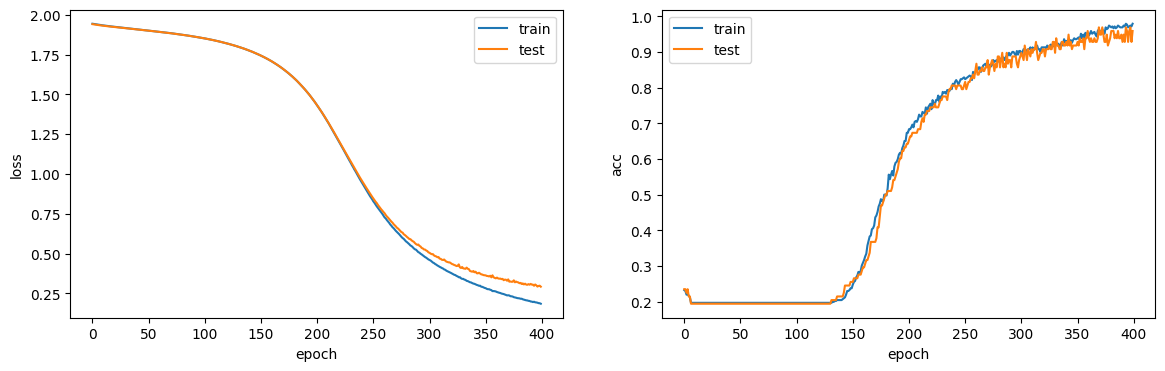

In [29]:
show_results(model, log)

## Probando el modelo

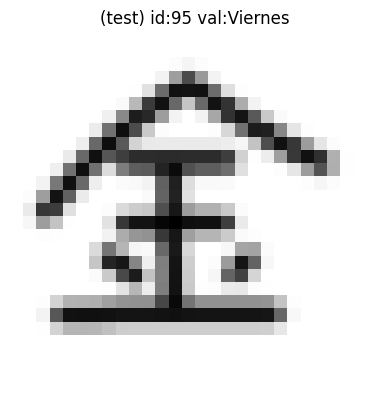

In [31]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]

days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

label_n = days[round(label)]

plt.title('(test) id:{} val:{}'.format(idx, label_n ))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()

## Usando el modelo entrenado

In [32]:
salida = model.predict(im[None,:,:,:])[0]
salida
#im[None,:,:,:]

1/1 [==============================] - 0s 220ms/step


array([1.11000016e-02, 2.38652825e-02, 1.67078804e-02, 1.47126860e-03,
       9.11265790e-01, 1.14067254e-04, 3.54758054e-02], dtype=float32)

[]

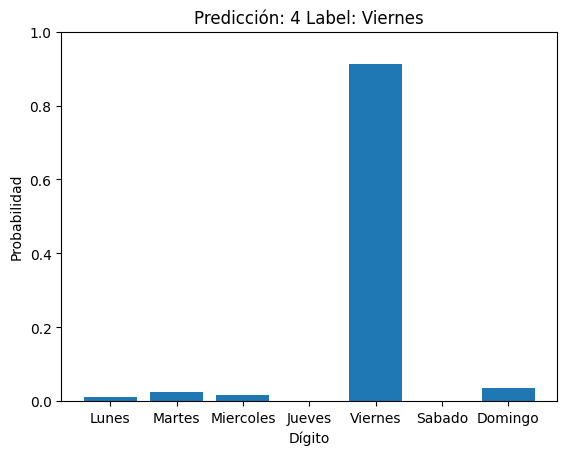

In [33]:
plt.figure()
plt.title("Predicción: {} Label: {}".format(salida.argmax(), days[round(label)] ))
plt.ylabel("Probabilidad")
plt.xlabel("Dígito")
plt.ylim([0,1])
#plt.bar(np.arange(7), salida)
plt.bar(days, salida)
plt.plot()